# Семинар 1. Начальный статистический анализ выборки

### Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns
from zlib import crc32
from collections import Counter

##### Задание параметров ```matplotlib```

In [2]:
# параметр для задания толщины линии
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 6
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# параметр для задания шрифта на осях 
plt.rcParams['legend.fontsize'] = 12
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 20
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.figsize'] = (8.0, 4.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 10

##### Построение графиков

In [3]:
def plot():
    '''
    Построение одного графика
    '''
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['figure.figsize'] = (8.0, 4.0)
    plt.rcParams['font.size'] = 18
    ###########################################

    x = np.linspace(-np.pi, np.pi)
    y = np.sin(x)
    plt.plot(x, y, label='$y = sin(x)$')
    x = np.arange(-1, 2)
    y = x
    plt.plot(x, y, label='$y = x$')
    # отрисовка легенды графика
    plt.legend(loc='best')
    # подпись осей
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    # заголовок
    plt.title('Title')
    # отрисовка сетки на графике
    plt.grid()
    plt.show()

In [4]:
def multiplot():
    '''
    Построение нескольких графиков
    '''

    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['figure.figsize'] = (16.0, 8.0)
    plt.rcParams['font.size'] = 50
    ###########################################

    fig = plt.figure();

    gs = gridspec.GridSpec(2, 2)

    subs = []
    for sub in gs:
        subs.append(fig.add_subplot(sub))
    subs = np.reshape(subs, [2,2])

    subplotNames = ['First', 'Second', 'Third', 'Forth']

    for i in range(4):
        subs[i//2][i%2].annotate(text=subplotNames[i], xy=(0,0))
        subs[i//2][i%2].set_xlim(-1,1)
        subs[i//2][i%2].set_ylim(-1,1)

    plt.show()

## 1. Статистическое исследование данных 
Будем выполнять в ```pandas```

### 1.1 Загрузка данных
Загрузим данные из csv-файла с помощью библиотеки pandas 

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Описание признаков:

- `CRIM`: уровень преступности на душу населения по городам
- `ZN`: доля жилых земель, разделенных на участки площадью более 25 000 кв. футов
- `INDUS`: Доля акров, не связанных с розничной торговлей, в городе
- `CHAS`: Близость реки (= 1, если участок граничит с рекой; 0 в противном случае).
- `NOX`: Концентрация оксида азота (частей на 10 миллионов)
- `RM`: Среднее количество комнат в доме
- `AGE`: Доля жилых помещений, построенных владельцами до 1940 года
- `DIS`: среднее взвешенное расстояния до пяти бостонских центров занятости
- `RAD`: Индекс доступности радиальных автомагистралей.
- `TAX`: Ставка налога на недвижимость в размере полной стоимости за $10000
- `PTRATIO`: соотношение учеников и учителей по городам
- `B` $=1000(B_k-0,63)^2$, где $B_k$ - доля лиц афроамериканского происхождения по городам
- `LSTAT`: Процент населения с низким социальным статусом
- `MEDV`: Средняя стоимость домов, занимаемых владельцами, в $1000.

### 1.2. Взятие выборки

In [7]:
# случайная выборка
data.sample(n=10, random_state=0)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34,22.6
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
487,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45,20.6
340,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29,18.7
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6


In [8]:
# Механическая выборка
data.iloc[1:30:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
21,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6


Взятие проекций

In [9]:
data['zn'].head(n=2)

0    18.0
1     0.0
Name: zn, dtype: float64

In [10]:
data.iloc[:, 1:3].head(n=2)

,zn,indus
0,18.0,2.31
1,0.0,7.07


### 1.3 Оценка распределения и ее визуализация
Средняя стоимость дома - вещественная величина, поэтому будем использовать интервальный ряд

In [11]:
x = data['medv']

Вычислим количество интервалов по формуле 
Стёрджеса $k = 1+\lfloor \log_{2}n\rfloor$


In [12]:
k = int(1+ np.floor(np.log2(len(x))))
k

9

Построим гистограмму

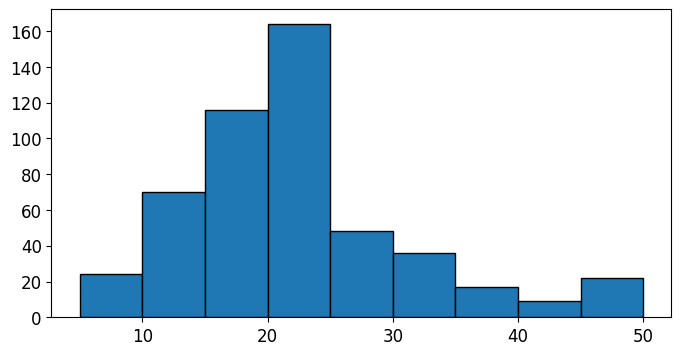

In [13]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

plt.hist(x, bins=k,edgecolor = 'black')
plt.show()

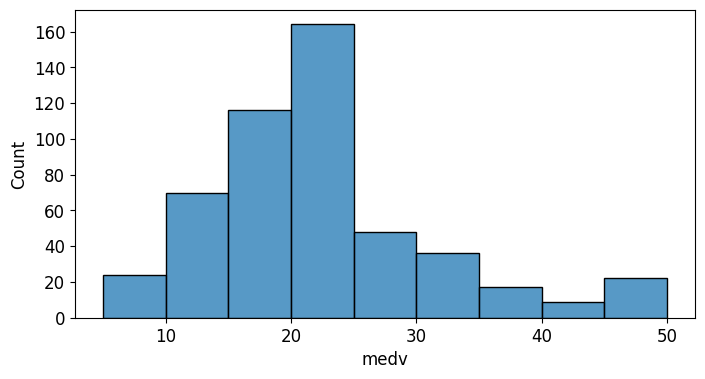

In [14]:
# или так:
sns.histplot(x, bins=k,edgecolor = 'black');


Изобразим эмперическую функцию плотности распределения

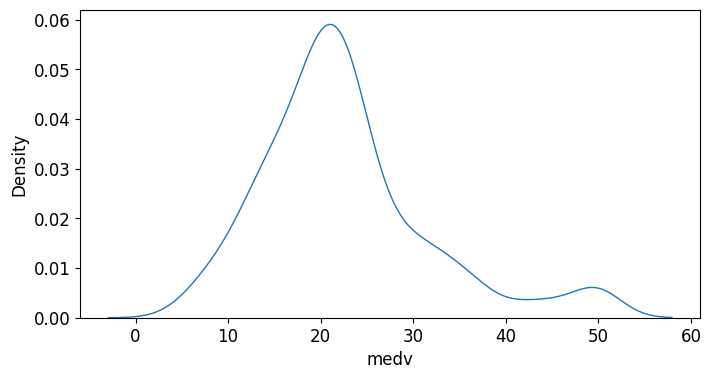

In [15]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################
sns.kdeplot(x)
plt.show()

Гистограму и эмпирическую функцию распределения удобно совместить

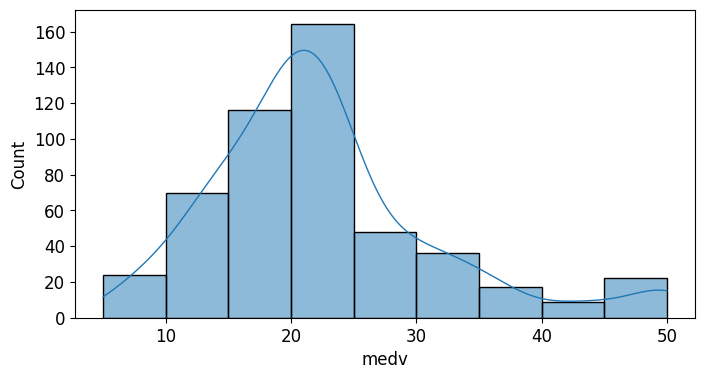

In [16]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sns.histplot(x, kde=True,bins=k)
plt.show()

Обратите внимание на наличие кружочков левее и правее усов. Так обозначаются те значения, которые не попали в промежуток выбросы, которЭто выбросы


### 1.4. Выборочные оценки

In [17]:
print(f'Минимум: {np.min(x)}')
print(f'Максимум: {np.max(x)}')
print(f'Среднее выборочное: {np.mean(x):.3f}')
print(f'Медиана:  {np.median(x)}')
print(f'Мода:  {st.mode(x).mode}')
print(f'Дисперсия: {np.var(x):.3f}')
print(f'Среднее квадратичное отклонение {np.std(x):.3f}')
print(f'Асимметиря {st.skew(x):.3f}') # Вычисляем асимметрию
print(f'Эксцесс {st.kurtosis(x,fisher=False):.3f}') # Вычисляем относительный эксцесс (эксцесс Пирсона)

# Да-да, я знаю про describe()

Минимум: 5.0
Максимум: 50.0
Среднее выборочное: 22.533
Медиана:  21.2
Мода:  50.0
Дисперсия: 84.420
Среднее квадратичное отклонение 9.188
Асимметиря 1.105
Эксцесс 4.469


Функции `np.var()` и `np.std()` имеют параметр `ddof` и часто встречаются в виде 
`np.var(x,ddof=1)` и `np.std(x,ddof=1)`.  Для чего используются такие модификации функций?

???

#### 1.5. Квантили распределения

In [18]:
Q1 = np.quantile(x,0.25)
Q2 = np.quantile(x,0.5)
Q3 = np.quantile(x,0.75)
IQR = Q3-Q1
 
print(f'IQR = {IQR:.3f}')


IQR = 7.975


Изобразим ящик с усами и гистограмму на одной диаграмме.


Text(28, 71, '$1.5\\cdot IQR$')

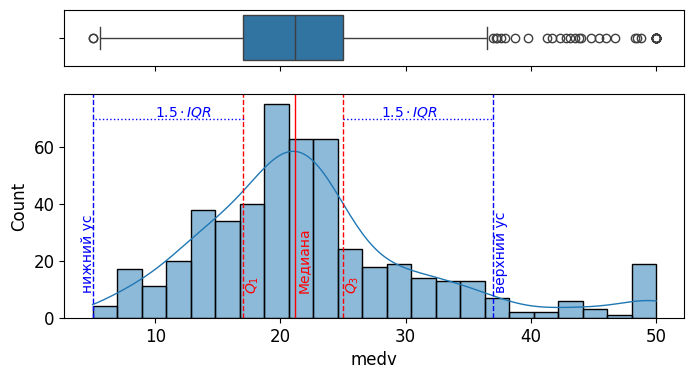

In [19]:
# Вычисление усов
l_us = Q1-1.5*IQR
r_us = Q3+1.5*IQR
# Выделение пространства для изображения ящика с усами и гистограммы
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, # число строк
    sharex=True, # Общая ось Х
    gridspec_kw={"height_ratios": (.20, .80)} 
)
# Построение диаграмм
sns.boxplot(x, orient='h', ax=ax_box)
sns.histplot(x, kde=True, ax=ax_hist)



# Линии разметки. Они на реальных илюстрациях не нужны
ax_hist.axvline(x=Q2, color='red', linestyle='-')
plt.text(Q2+0.1,10,'Медиана', color='red',rotation=90)

ax_hist.axvline(x=Q1, color='red', linestyle='--')
plt.text(Q1+0.1,10,r'$Q_1$', color='red',rotation=90)
ax_hist.axvline(x=Q3, color='red', linestyle='--')
plt.text(Q3+0.1,10,r'$Q_3$', color='red',rotation=90)

ax_hist.axvline(x=l_us, color='blue', linestyle='--')
ax_hist.axvline(x=r_us, color='blue', linestyle='--')
plt.text(l_us-1,10,'нижний ус', color='blue',rotation=90)
plt.text(r_us+0.1,10,'верхний ус', color='blue',rotation=90)

ax_hist.axhline(y=70, xmin=0.05,xmax=0.29, color='blue', linestyle=':')
ax_hist.axhline(y=70, xmin=0.45,xmax=0.69, color='blue', linestyle=':')
plt.text(10,71,r'$1.5\cdot IQR$', color='blue',rotation=0)
plt.text(28,71,r'$1.5\cdot IQR$', color='blue',rotation=0)


Большое число выбросов справа может означать (а в данном случае означает), что распределение не одномодальное и требует более пристального исследования.

ВАЖНО! Это учебный пример, который призван показать связь между гистограммой, квартилями и ящиком с усами.

На практике ящики с усами используются чтобы продемонстрировать различия в распределениях разных выборок.

#### Ранжирование ряда 
Вычислим ранг элемента $x=16$

In [20]:
ranks = st.rankdata(x) # элементы массива - ранги элементов массива x

ind = np.where(x==16)[0] 
print(f'rank(16)={ranks[ind][0]}')

rank(16)=111.0


## Построение эмпирических функций распределения
- генеральной совокупности
- подвыборки, содержащей только значения $x \geqslant 21.2$
- случайной подвыборки


<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_144136/2769897203.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.hist(x[x>=21.2], cumulative=True, label='Выборка $x \geqslant 21.2$', alpha=0.5)


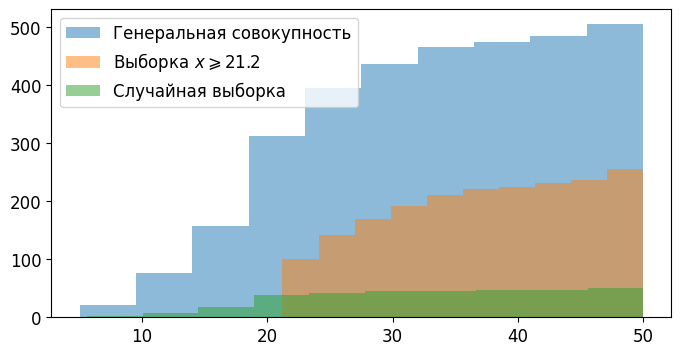

In [21]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sample = x.sample(50, random_state=0)
plt.hist(x, cumulative=True, label='Генеральная совокупность', alpha=0.5)
plt.hist(x[x>=21.2], cumulative=True, label='Выборка $x \geqslant 21.2$', alpha=0.5)
plt.hist(sample, cumulative=True, label='Случайная выборка', alpha=0.5)
plt.legend(loc='best')
plt.show();

Намного лучше вид распределений отражает диаграма плотностей вероятности

<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_144136/744395785.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.hist(x[x>=21.2], cumulative=True, label='Выборка $x \geqslant 21.2$', density=True, alpha=0.5)


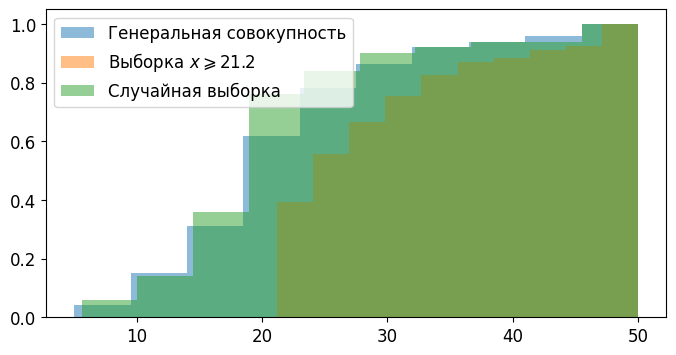

In [22]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sample = x.sample(50, random_state=0)
plt.hist(x, cumulative=True, label='Генеральная совокупность', density=True,alpha=0.5)
plt.hist(x[x>=21.2], cumulative=True, label='Выборка $x \geqslant 21.2$', density=True, alpha=0.5)
plt.hist(sample, cumulative=True, label='Случайная выборка', density=True, alpha=0.5)
plt.legend(loc='best')
plt.show();

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_144136/643744859.py:5: SyntaxWarning: invalid escape sequence '\g'
  sns.displot(x[x>=21.2], kde=True, stat = 'density', bins=k, label='Выборка $x \geqslant 21.2$')


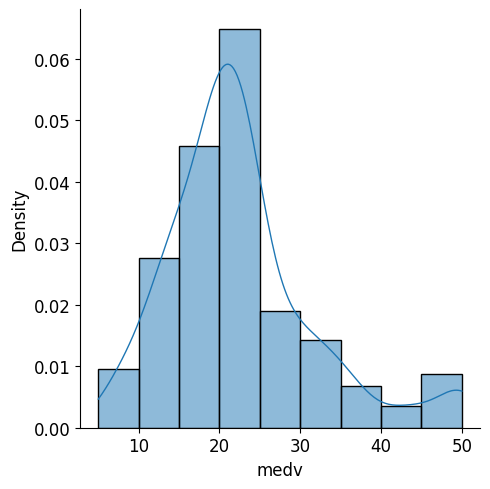

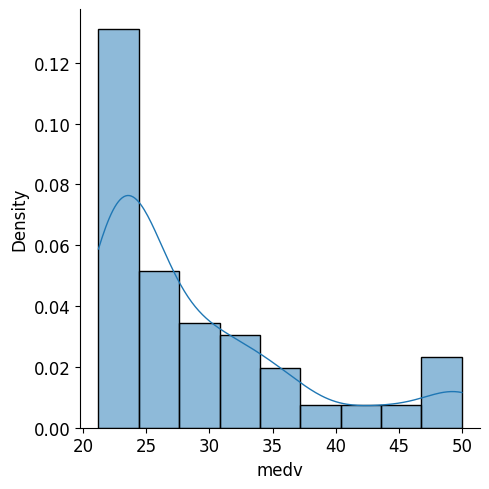

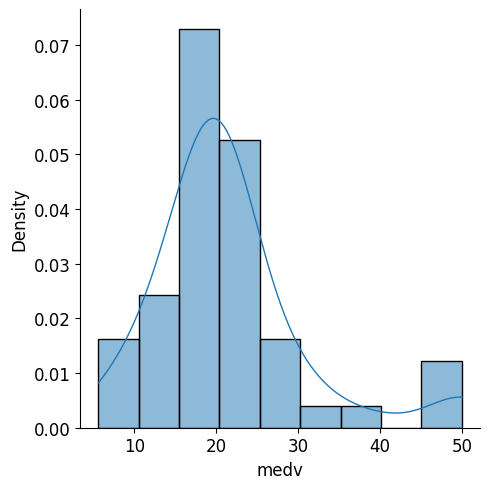

In [23]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sns.displot(x, kde=True,stat = 'density', bins=k, label='Генеральная совокупность')
sns.displot(x[x>=21.2], kde=True, stat = 'density', bins=k, label='Выборка $x \geqslant 21.2$')
sns.displot(sample, kde=True,stat = 'density', bins=k,label='Случайная выборка')


plt.show()

Как видим, случайная выборка из 50 элементов довольно хорошо отражает генеральную совокупность

#### Выборочные оценки для подвыборки содержащей только значения $x \geqslant 21.2$

In [24]:
#Ваш код...

Ожидаемый ответ:
```
mean=29.001960784313727
std=8.224008139636966, hat_std=8.240181229279456
median=25.0
mode=ModeResult(mode=array([50.]), count=array([16]))
maximum=50.0; (67)
minimum=21.2; (16)
q(0.5)=25.0
размах=9.600000000000001
```

#### Выборочные оценки для подвыборки содержащей только значения $x \geqslant 21.2$

In [25]:
#Ваш код...

### 1.6 Выполнение интервального оценивания

Построим интервальные оценки для средней выборочной и выборочной дисперсии 
на уровне доверия $\gamma = 0.95$

! Мы понимаем, что наше распределение двухмодальное использовать для него методы, разработанные для нормального распределения - серьезная ошибка. 

Но мы попробуем допустить, что по ЦПТ математическое ожидание в пределе подчинено нормальному распределению.


In [26]:
N = len(x) # Объем генеральной совокупности
n = len(sample) # объем выборки
gamma = 0.95 # Наждежность доверительного интервала
alpha = 1-gamma 

Рассмотрим выборку `sample`. Вычислим для нее оценки средней выборочной и дисперсии

In [27]:
sample_mean = np.mean(sample)
sample_var = np.var(sample,ddof = 1)


Вычислим квантиль распределения Стьюдента $t_{n-1,1-\frac{\alpha}{2}}$ пользуясь обратной функцией распределения Стьюдента (`scipy.stats.t.ppf(q, k)`)
где $k=n-1$, $q=,1-\frac{\alpha}{2}$

In [28]:
q = 1- alpha/2
t = st.t.ppf(q,n-1)

Вычислим дисперсию оценки генеральной средней для **бесповторной** выборки

In [29]:
sigma2 = sample_var/n*(N-n)/(N-1)
s = np.sqrt(sigma2)

In [30]:
# Границы доверительного интервала
ci_upper = sample_mean + t * s
ci_lower = sample_mean - t * s
print(f'Точечная оценка математического ожидания: {sample_mean:.3f}')
print(f'Доверительный интервал [{ci_lower:.3f};{ci_upper:.3f}]')

Точечная оценка математического ожидания: 21.570
Доверительный интервал [19.025;24.115]


Cоберем вычисления в функцию:

In [31]:
def get_confidence_interval(sample,gamma,N):
    n = len(sample) # объем выборки
    alpha = 1-gamma 
    sample_mean = np.mean(sample)
    sample_var = np.var(sample,ddof = 1)
    q = 1- alpha/2
    t = st.t.ppf(q,n-1)
    if N is not None:
        sigma2 = sample_var/n*(N-n)/(N-1)
    else:
        sigma2 = sample_var/n

    s = np.sqrt(sigma2)
    ci_upper = sample_mean + t * s
    ci_lower = sample_mean - t * s



Проведем эксперимент, сформировав 100 аналогичных выборок и вычислим их средние значения:


In [32]:
def in_interval (x,interval):
    return (x>=interval[0]) and (x<=interval[1])

In [33]:
x_mean = np.mean(x)
delta = (ci_upper-ci_lower)/2

means = [np.mean(x.sample(50, random_state=i)) for i in range(100)]

prob = np.mean([in_interval(x_mean,(i-delta,i+delta)) for i in means])
print(f'Эмпирическая доля выборок, интервальная оценка для которых накрыха точное значение математического ожидания равна {prob:.3f}')

Эмпирическая доля выборок, интервальная оценка для которых накрыха точное значение математического ожидания равна 0.960


Применим бутстреп для оценки математического ожидания по выборке sample

Доверительный интервал: (19.33;24.62)


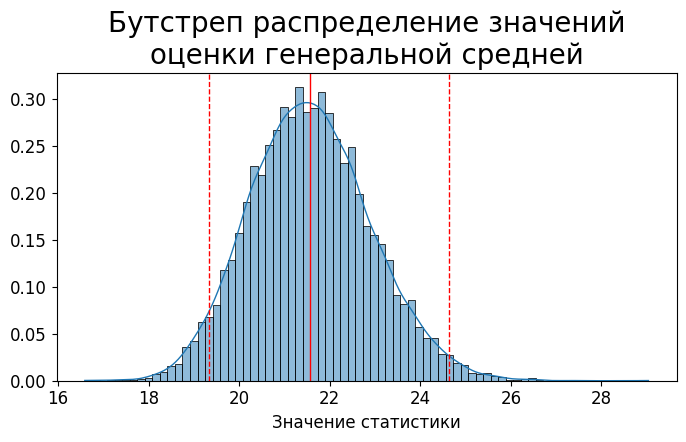

In [34]:
state = 1
rs = np.random.RandomState(state)
vals = sample.values.reshape(1,-1) # Исследуемая выборка должна быть многомерной структурой
res = st.bootstrap(
    vals, # выборка к которой применяется бутстреп
    statistic=np.mean,  # функция нахождения характеристики СВ, оценка которой вычисляется
    n_resamples=10000, # число подвыборок,
    confidence_level=0.95, 
    random_state=state # случайный генератор, для повторимости эксперимента.
)
ci = (res.confidence_interval.low, res.confidence_interval.high)
dist = res.bootstrap_distribution
print(f'Доверительный интервал: ({ci[0]:.2f};{ci[1]:.2f})')
fig, ax = plt.subplots()
sns.histplot(dist, kde=True, stat='density',ax=ax)

# Изображение доверительного интервала вертикальными линиями
ax.axvline(x=ci[0], color='red', linestyle='--')
ax.axvline(x=ci[1], color='red', linestyle='--')
ax.axvline(x=np.mean(sample), color='red', linestyle='-')

ax.set_title('Бутстреп распределение значений\nоценки генеральной средней')
ax.set_xlabel('Значение статистики')
ax.set_ylabel('')
plt.show()


## 2. Задание для самостоятельной работы

### Код генерации выборки

In [35]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@vyatsu.ru")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    rs = np.random.RandomState(2)
    distributions = [
        st.norm(rs.randint(low=-5, high=5),rs.uniform(0,2)),
        st.norm(rs.randint(low=3, high=8),rs.uniform(0,3)),
        st.norm(rs.randint(low=-8, high=-3),rs.uniform(0,2)),
    ]    
    dists = [distributions[rs.randint(low=0, high=3)] for _ in range(3)]
    sizes = [200,200,400]
    data = [dists[i].rvs(size=sizes[i], random_state=rs) for i in range(3)]
    full_data = (10*(np.concatenate(data[:2])+data[2])).astype(int)
    
    mode_cnt = st.mode(full_data)[1] 
    counts = Counter(full_data.tolist())
    
    to_add = []
    for i in range(rs.randint(low = 1, high = 5)):
        obj_to_add = int(rs.randint(low=-250, high=251, size=1)[0])
        to_add += [obj_to_add for _ in range(0, int(mode_cnt - counts.get(obj_to_add, 0)))]
        
    full_data = np.concatenate([full_data, to_add])
    rs.shuffle(full_data)
    return np.array(full_data)

def generate_variant():
    mail = input(prompt='Enter your mail: ')
    assert EMAIL_REGEX.match(mail), 'Почтовый адрес не в домене vyatsu.ru'
    uid = crc32(mail.encode('utf-8'))
    data = generate_dataset(uid)
    print(f'Ваш id: {uid}')
    return data

### 2.1. Генерация индивидуального задания

<span style="color:red">
    ВАЖНО! Проверяю работу по адресу Вашей корпоративной почты. 
</span>
    
Внимательно вводите адрес для которой выполняется задание!



In [36]:
data = generate_variant()

Ваш id: 1845842090


### 2.2 Формирование выборок
Сформируйте следующие выборки:
- $X_1$ - случайная выборка из 20 наблюдений
- $X_2$ - случайная выборка из 50 наблюдений
- $X_3$ - механическая выборка из 50 наблюдений с шагом 5




In [37]:
data

array([ -87,  100,  100,   84,   76,  -45,  101,  -33,  -21,   44,  -31,
        -12,   63,   18,  -48,  -56,   53,   42,   84,   26,   69,   73,
        -25,  -36,  -31,  -27,   -7,   39,  104,  -27,  -28,   -4,   33,
        -87,   46,  -73,   87,  -56,   71,  -56,  -15,   87,   48,   16,
        -50,   36,   27,  -30,  -21,  -42,   -4,   47,  -26,   47,  -33,
        -62,  -32,   -9,  -54,   49,  -15,  -16,   64,  -33,   -2,  -28,
        -60,   73,  -45,  -10,  -87,   90,  -35,   31,   -7,  -57,  -49,
         34,   52,   73,   31,  -43,  -44,  -52,  -14,  -39,   85,  -50,
         86,   64,   59,   20,   24,   46,   10,   29,  105,   73,  -62,
         94, -180,  -52,   18,   62,   51,   54,   80,  -42,   69,  -49,
         -5,   36,   25,   30,   15,  -12,   72,   50,  -52,  -46,  -25,
         68,   22,  -17,  -10,  -87,    0,   56,   82,  -36,  -30,  -48,
         64,  -20,  -36,  -56,   56,  -38,  -22,   13,   57,   63,  -29,
         51,   79,    0,   60,   50,   33,  -62,  -

### 2.3 Графический анализ выборок
Для каждой выборки $X_1$,  $X_2$, $X_3$:
1. Определите количество уникальных значений
2. Изобразите гистограмму или полигон частот. (количество интервалов для гистограммы вычислите по формуле Стёрджеса)
3. Изобразите график эмпирической функции распределения
4. Сделайте выводы о свойствах распределения 
5. Похожи ли распределения выборок?
6. Отражают ли выборки свойства генеральной совокупности?


In [38]:
#Ваш код

**Выводы:**
- ...
- ...

### 2.4 Графическое сравнение выборок

1. Изобразите на ожном полотне ящики с усами для всех трех выборок
2. Похожи ли распределения выборок?


In [39]:
#Ваш код

**Выводы:**
- ...
- ...

### 2.5 Статистический анализ выборок. Точечные оценки
Для каждой выборки $X_1$, $X_2$, $X_3$:
Вычислить точечные оценки распределения:
1. Выборочное среднее
2. Выборочную медиану
3. Выборочную абсолютную моду
4. Выборочную несмещенную оценку дисперсии
5. Оценки асимметрии и эксцесса.
6. Определите расстояние от оценненных значений, до точных значений соответствующей генеральной совокупности.

In [40]:
# Ваш код:

### 2.6 Статистический анализ выборок. Интервальные оценки
Для выборок $X_1$ и $X_2$. На уровне доверия 0.95 вычислите интервальные оценки:
1. математического ожидания (двумя способами: параметрическим, считая распределение блихким к нормальному и c помощью бутстреп),
2. медианы (с помощью бутстреп, взяв 10000 подвыборок)
3. дисперсии (с помощью бутстреп, взяв 10000 подвыборок),
4. Сделайте выводы о качестве интервальной оценки. Насколько широк интервал, как влияет объем выборки на результат оценки.
5. Можно ли считать по выборкам распределение нормальным.

In [41]:
# Ваш код: